In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('../input/turkey-earthquake-tweets/turkey_earthquake_tweets.csv')
print(df.shape)
df = df.head(500)
print(df.shape)
df.head()


(28844, 16)
(500, 16)


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1624185742552403969,Gogoman,NaN,NaN,2012-12-26 12:08:27+00:00,369,2076.0,99630.0,False,2023-02-10 23:17:11+00:00,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,NaN,Twitter for Android,0.0,0.0,False
1,1624155272179580928,Crypto Dough Doe,"London, England",Get rich our die buying! $link,2019-11-13 23:30:36+00:00,1002,447.0,3798.0,False,2023-02-10 21:16:06+00:00,Hi People...any help here would be much apprec...,NaN,Twitter Web App,0.0,0.0,False
2,1624144833647415325,Eylem KILIÇ,NaN,⚕,2020-07-21 16:12:08+00:00,85,143.0,2737.0,False,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desp...,"['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD']",Twitter for Android,0.0,0.0,False
3,1624123056372187143,bee | tarlos 🎗,NaN,NaN,2018-03-24 12:03:03+00:00,0,6.0,68704.0,False,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #Turkey...,"['TurkeyQuake', 'türkiye', 'deprem']",Twitter for iPhone,0.0,0.0,False
4,1624121846479061019,Ameya,India,Life lead by curiousity & mind filled with que...,2017-10-26 16:20:28+00:00,29,146.0,106.0,False,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,['TurkeyQuake'],Twitter for iPhone,0.0,0.0,False


In [3]:
columns_to_drop = ["id", "user_description", "user_name", "user_verified", "source"]
df = df.drop(columns_to_drop, axis=1)
df.head()

,user_location,user_created,user_followers,user_friends,user_favourites,date,text,hashtags,retweets,favorites,is_retweet
0,NaN,2012-12-26 12:08:27+00:00,369,2076.0,99630.0,2023-02-10 23:17:11+00:00,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,NaN,0.0,0.0,False
1,"London, England",2019-11-13 23:30:36+00:00,1002,447.0,3798.0,2023-02-10 21:16:06+00:00,Hi People...any help here would be much apprec...,NaN,0.0,0.0,False
2,NaN,2020-07-21 16:12:08+00:00,85,143.0,2737.0,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desp...,"['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD']",0.0,0.0,False
3,NaN,2018-03-24 12:03:03+00:00,0,6.0,68704.0,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #Turkey...,"['TurkeyQuake', 'türkiye', 'deprem']",0.0,0.0,False
4,India,2017-10-26 16:20:28+00:00,29,146.0,106.0,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,['TurkeyQuake'],0.0,0.0,False


Missing Values:
 user_location      160
user_created         0
user_followers       0
user_friends         0
user_favourites      0
date                 0
text                 0
hashtags           183
retweets             0
favorites            0
is_retweet           0
dtype: int64

Percentage of Missing Values:
 user_location      32.0
user_created        0.0
user_followers      0.0
user_friends        0.0
user_favourites     0.0
date                0.0
text                0.0
hashtags           36.6
retweets            0.0
favorites           0.0
is_retweet          0.0
dtype: float64


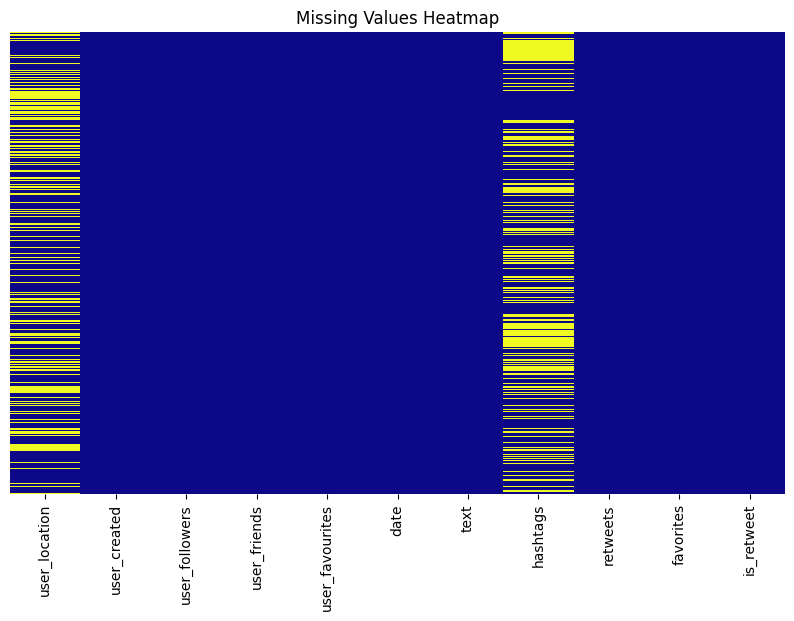

In [4]:
# Check for missing values in DataFrame
missing_values = df.isnull().sum()

print("Missing Values:\n", missing_values)

missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='plasma', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [5]:
import string
df['tokens'] = df['text'].apply(word_tokenize)
df['cleaned_text'] = df['text'].str.lower()
text_data = df['cleaned_text'] = df['cleaned_text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
print(text_data)

0      simonkjaer1989 acmilan acmilanbr acmilanar acm...
1      hi peopleany help here would be much appreciat...
2      jlo intimissimi turkeyquake  we are in despera...
3      thank you rafael this means a lot 😭😭😭💜 turkeyq...
4      adgpi hey bbcworld try to cover these stories ...
                             ...                        
495    3 days ago he predicted that a strong earthqua...
496    threemonth long state of emergency declared in...
497    accepting crypto donations via thegivingblock ...
498    after 31st hour under rubble \n9year old zaina...
499    im so sad i dont even know what to say  😥\near...
Name: cleaned_text, Length: 500, dtype: object


0      False
1      False
2      False
3      False
4      False
       ...  
495     True
496    False
497    False
498     True
499     True
Name: contains_earthquake, Length: 500, dtype: bool
                                          cleaned_text  contains_earthquake
0    simonkjaer1989 acmilan acmilanbr acmilanar acm...                False
1    hi peopleany help here would be much appreciat...                False
2    jlo intimissimi turkeyquake  we are in despera...                False
3    thank you rafael this means a lot 😭😭😭💜 turkeyq...                False
4    adgpi hey bbcworld try to cover these stories ...                False
..                                                 ...                  ...
495  3 days ago he predicted that a strong earthqua...                 True
496  threemonth long state of emergency declared in...                False
497  accepting crypto donations via thegivingblock ...                False
498  after 31st hour under rubble \n9year old

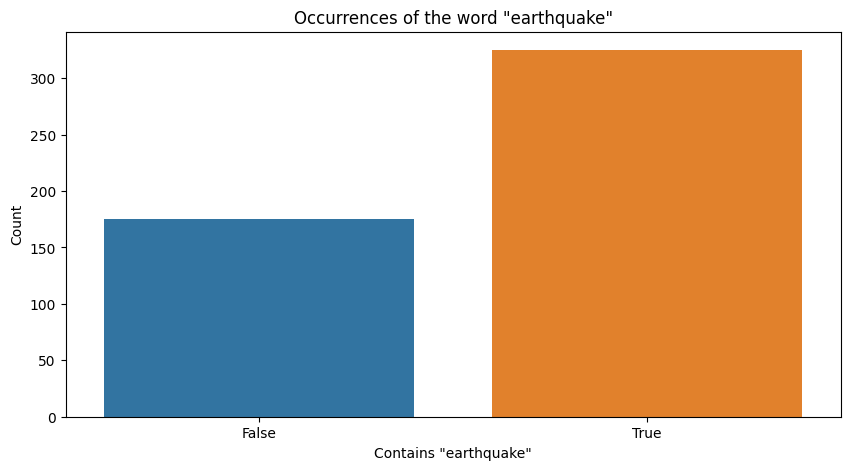

In [6]:
df['contains_earthquake'] = df['cleaned_text'].str.contains('earthquake')
ehqk_count = df['contains_earthquake']
print(ehqk_count)
print(df[['cleaned_text', 'contains_earthquake']])
plt.figure(figsize=(10, 5))
sns.countplot(x='contains_earthquake', data=df)
plt.title('Occurrences of the word "earthquake"')
plt.xlabel('Contains "earthquake"')
plt.ylabel('Count')
plt.show()

                                          cleaned_text  polarity
0    simonkjaer1989 acmilan acmilanbr acmilanar acm...  0.000000
1    hi peopleany help here would be much appreciat...  0.266667
2    jlo intimissimi turkeyquake  we are in despera... -0.050000
3    thank you rafael this means a lot 😭😭😭💜 turkeyq...  0.000000
4    adgpi hey bbcworld try to cover these stories ...  0.200000
..                                                 ...       ...
495  3 days ago he predicted that a strong earthqua...  0.216667
496  threemonth long state of emergency declared in... -0.050000
497  accepting crypto donations via thegivingblock ...  0.000000
498  after 31st hour under rubble \n9year old zaina...  0.100000
499  im so sad i dont even know what to say  😥\near... -0.500000

[500 rows x 2 columns]


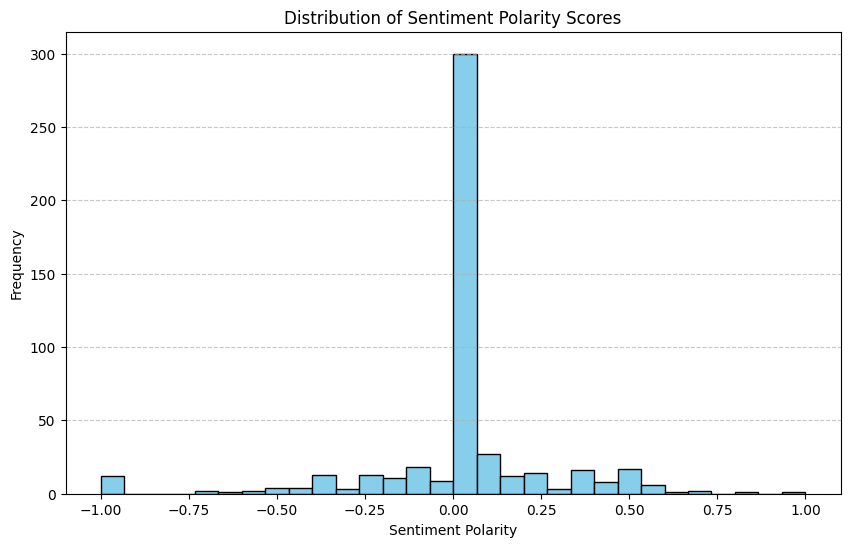

In [7]:
#SENTIMENTAL VISUALIZATION

df['polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print the DataFrame with sentiment scores
print(df[['cleaned_text', 'polarity']])

plt.figure(figsize=(10, 6))
plt.hist(df['polarity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

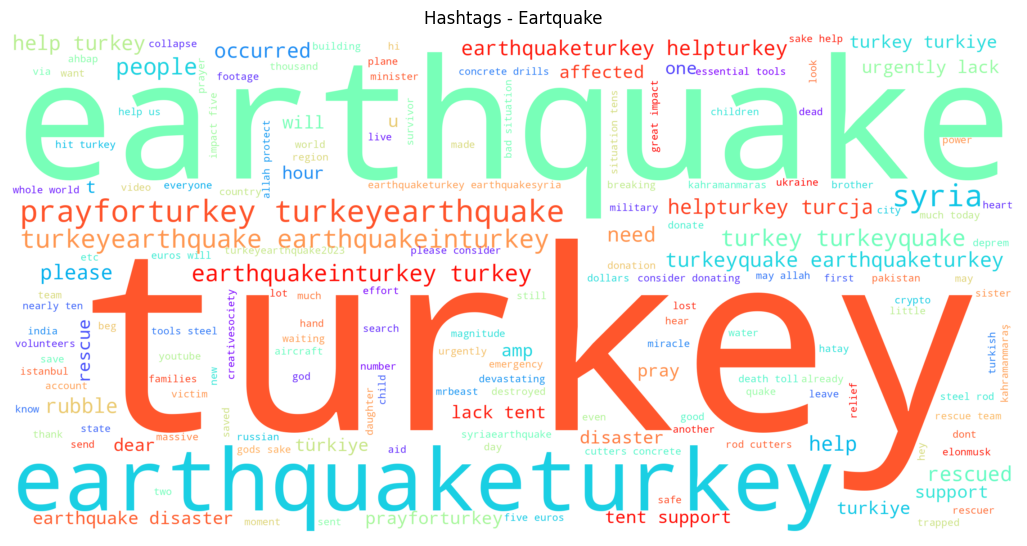

In [8]:
#WORD CLOUD
from PIL import Image 

from wordcloud import WordCloud

wrds = df["cleaned_text"]

def build_word_cloud(words,back_color,palette,title) :
    word_cloud = WordCloud(scale = 7,max_words = 1000,
                           max_font_size = 100,background_color = back_color,
                           random_state = 0,colormap = palette
                          ).generate(" ".join(words))
    plt.figure(figsize = (13,8))
    plt.imshow(word_cloud,interpolation = "bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

build_word_cloud(wrds,"white","rainbow","Hashtags - Eartquake")

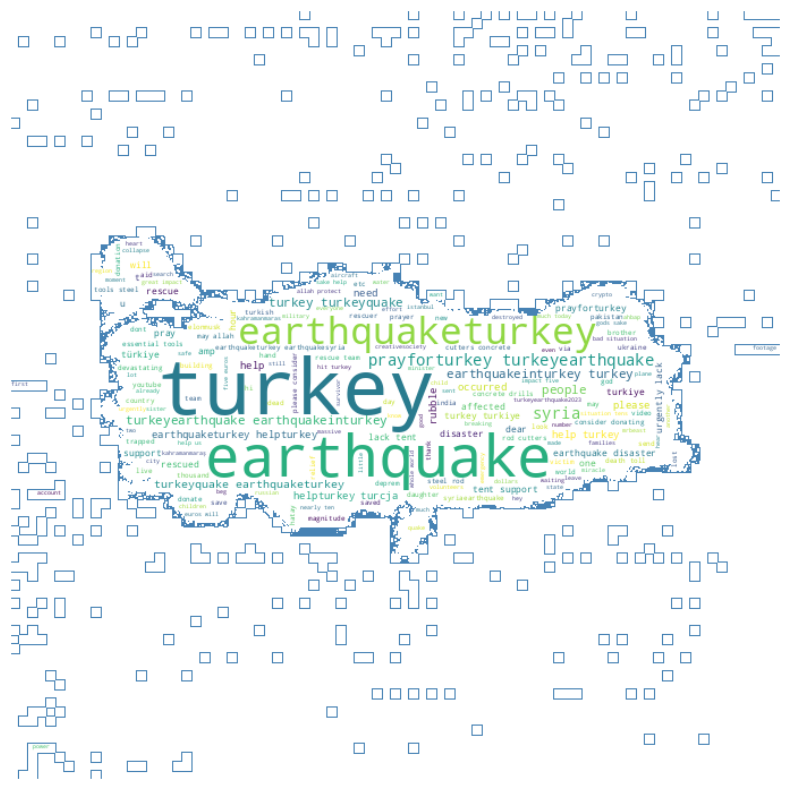

In [9]:
#WORD CLOUD VISUALIZATION WITH THE MAP OF TURKEY

mask_image = np.array(Image.open('../input/map-jpg/map.jpeg'))
wordcloud = WordCloud(
    background_color='white',
    mask=mask_image,
    contour_width=1,
    contour_color='steelblue').generate(" ".join(wrds))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()